In [3]:
!pip install yfinance
!pip install pandas-datareader

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [1]:
# Import necessary library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
import scipy as sc
import datetime as dt
import yfinance as yf
import pandas_datareader.data as web
import plotly.express as px
from scipy.stats import norm
import random
import math
import plotly.graph_objects as go
import seaborn as sb
from scipy.stats import norm, t

# 1. Gathering 2020 and 2021 Data for Portfolio

In [2]:
# Automobile stocks stading on NYSE

stock_dict = {'RUSHB':'Rush Enterprises, Inc. - Class B',
'RACE':'Ferrari N.V.',
'AXL':'American Axle & Manufacturing Holdings, Inc.',
'HRI':'Herc Holdings Inc.',
'SUP':'Superior Industries International, Inc.',
'ADNT':'Adient plc',
'MGA':'Magna International, Inc.',
'PCAR':'PACCAR Inc.',
'ALSN':'Allison Transmission Holdings, Inc.',
'ORLY':"O'Reilly Automotive, Inc.",
'VC':'Visteon Corporation',
'SAH':'Sonic Automotive, Inc.',
'RUSHA':'Rush Enterprises, Inc. - Class A',
'CAAS':'China Automotive Systems, Inc.',
'DAN':'Dana Holding Corporation',
'GM':'General Motors Company',
'HMC':'Honda Motor Company, Ltd.',
'TM':'Toyota Motor Corporation',
'CSTM':'Constellium N.V.',
'F':'Ford Motor Company',
'PRTS':'U.S. Auto Parts Network, Inc.',
'ALV':'Autoliv, Inc.',
'APTV':'Aptiv PLC',
'VLDR':'Velodyne Lidar, Inc.',
'TTM':'Tata Motors Limited',
'DORM':'Dorman Products, Inc.',
'MPAA':'Motorcar Parts of America, Inc.',
'GT':'The Goodyear Tire & Rubber Company',
'LEA':'Lear Corporation',
'FSR':'Fisker Inc.',
'ALPP':'Alpine 4 Holdings, Inc.',
'STRT':'Strattec Security Corporation',
'GETR':'Getaround, Inc.'
}

In [3]:
start_2020 = dt.datetime(2020,1,1)
end_2020 = dt.datetime(2020,12,31)
start_2021 = dt.datetime(2021,1,1)
end_2021 = dt.datetime(2021,12,31)

In [4]:
stocks = list(stock_dict.keys())

In [5]:
data_2020 = pd.DataFrame()
for i in stocks:
    data_2020[i] = yf.Ticker(i).history(start=start_2020, end=end_2020)['Close']

- GETR: Data doesn't exist for startDate = 1577854800, endDate = 1609390800


In [6]:
data_2020.dropna(axis=1, inplace=True)

In [7]:
data_2021 = pd.DataFrame()
for i in stocks:
    data_2021[i] = yf.Ticker(i).history(start=start_2021, end=end_2021)['Close']

In [8]:
data_2021.dropna(axis=1, inplace=True)

In [9]:
data_2020.to_csv("stock_data_2020.csv")
data_2021.to_csv("stock_data_2021.csv")

## Selecting stocks based on stock volatility and returns

In [10]:
def stock_perf(stocks):
    stock_perf_df = pd.DataFrame()
    returns = stocks.pct_change()
    stock_perf_df['meanReturns'] = returns.mean()
    stock_perf_df['daily_volatility'] = daily_volatility = returns.std()
    stock_perf_df['monthly_volatility'] = math.sqrt(21) * daily_volatility
    stock_perf_df['annual_volatility'] = math.sqrt(252) * daily_volatility
    return stock_perf_df

In [11]:
perf_data = stock_perf(data_2020)

In [12]:
final_stocks = list(perf_data[perf_data.annual_volatility < perf_data.annual_volatility.mean()].sort_values(by='meanReturns', ascending=False)[0:12].index)

In [66]:
perf_data[perf_data.annual_volatility < perf_data.annual_volatility.mean()].sort_values(by='meanReturns', ascending=False)[0:12]

,meanReturns,daily_volatility,monthly_volatility,annual_volatility
APTV,0.002313,0.045405,0.208070,0.720776
VC,0.002153,0.039479,0.180917,0.626715
RUSHB,0.001853,0.041880,0.191918,0.664822
MGA,0.001784,0.035037,0.160560,0.556196
RUSHA,0.001719,0.031311,0.143487,0.497053
RACE,0.001570,0.024740,0.113375,0.392741
LEA,0.001248,0.036571,0.167591,0.580553
GM,0.001243,0.038573,0.176766,0.612334
DORM,0.001075,0.030252,0.138634,0.480242
ALV,0.000964,0.034306,0.157209,0.544587


In [13]:
final_stocks

['APTV',
 'VC',
 'RUSHB',
 'MGA',
 'RUSHA',
 'RACE',
 'LEA',
 'GM',
 'DORM',
 'ALV',
 'TTM',
 'PCAR']

In [14]:
for i in final_stocks:
    print(stock_dict[i])

Aptiv PLC
Visteon Corporation
Rush Enterprises, Inc. - Class B
Magna International, Inc.
Rush Enterprises, Inc. - Class A
Ferrari N.V.
Lear Corporation
General Motors Company
Dorman Products, Inc.
Autoliv, Inc.
Tata Motors Limited
PACCAR Inc.


In [15]:
final_stocks_data = pd.DataFrame()
for i in final_stocks:
    final_stocks_data[i] = yf.Ticker(i).history(start=start_2020, end=end_2020)['Close']

### Visualizing the selected stock

In [16]:
fig = px.line(final_stocks_data)
fig

In [17]:
correlation_matrix = final_stocks_data.corr(method='pearson')
correlation_matrix

,APTV,VC,RUSHB,MGA,RUSHA,RACE,LEA,GM,DORM,ALV,TTM,PCAR
APTV,1.000000,0.959939,0.960889,0.978812,0.943843,0.902667,0.959853,0.950974,0.870922,0.968835,0.800032,0.816129
VC,0.959939,1.000000,0.902973,0.948213,0.877530,0.874258,0.959007,0.941510,0.800981,0.917878,0.779228,0.716343
RUSHB,0.960889,0.902973,1.000000,0.945773,0.950903,0.854654,0.932151,0.937378,0.887305,0.961521,0.834257,0.826356
MGA,0.978812,0.948213,0.945773,1.000000,0.923150,0.900861,0.964825,0.933158,0.839101,0.959720,0.822608,0.820712
RUSHA,0.943843,0.877530,0.950903,0.923150,1.000000,0.930740,0.885289,0.859802,0.948664,0.922617,0.690418,0.923208
RACE,0.902667,0.874258,0.854654,0.900861,0.930740,1.000000,0.838126,0.801620,0.877002,0.859855,0.614025,0.880364
LEA,0.959853,0.959007,0.932151,0.964825,0.885289,0.838126,1.000000,0.940752,0.812673,0.959866,0.859583,0.751491
GM,0.950974,0.941510,0.937378,0.933158,0.859802,0.801620,0.940752,1.000000,0.798552,0.944641,0.865476,0.698963
DORM,0.870922,0.800981,0.887305,0.839101,0.948664,0.877002,0.812673,0.798552,1.000000,0.882030,0.668857,0.927891
ALV,0.968835,0.917878,0.961521,0.959720,0.922617,0.859855,0.959866,0.944641,0.882030,1.000000,0.864489,0.828616


In [18]:
fig = px.imshow(correlation_matrix, text_auto=True,aspect="auto")
fig.show()

# 2. Building the protoflio using MPT and Efficient Frontier

In [19]:
def getData(stocks):
    returns = stocks.pct_change()
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return meanReturns, covMatrix

In [20]:
def portfolioPerformance(weights, meanReturns, covMatrix):
    returns = np.sum(meanReturns*weights)*252
    std = np.sqrt(
            np.dot(weights.T,np.dot(covMatrix, weights))
           )*np.sqrt(252)
    return returns, std

In [21]:
def negativeSR(weights, meanReturns, covMatrix, riskFreeRate = 0):
    pReturns, pStd = portfolioPerformance(weights, meanReturns, covMatrix)
    return - (pReturns - riskFreeRate)/pStd
def maxSR(meanReturns, covMatrix, riskFreeRate = 0, constraintSet=(0,1)):
    "Minimize the negative SR, by altering the weights of the portfolio"
    numAssets = len(meanReturns)
    args = (meanReturns, covMatrix, riskFreeRate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = constraintSet
    bounds = tuple(bound for asset in range(numAssets))
    result = sc.optimize.minimize(negativeSR, numAssets*[1./numAssets], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

In [22]:
def portfolioVariance(weights, meanReturns, covMatrix):
    return portfolioPerformance(weights, meanReturns, covMatrix)[1]
def minimizeVariance(meanReturns, covMatrix, constraintSet=(0,1)):
    """Minimize the portfolio variance by altering the 
     weights/allocation of assets in the portfolio"""
    numAssets = len(meanReturns)
    args = (meanReturns, covMatrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = constraintSet
    bounds = tuple(bound for asset in range(numAssets))
    result = sc.optimize.minimize(portfolioVariance, numAssets*[1./numAssets], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

In [23]:
def portfolioReturn(weights, meanReturns, covMatrix):
        return portfolioPerformance(weights, meanReturns, covMatrix)[0]
def efficientOpt(meanReturns, covMatrix, returnTarget, constraintSet=(0,1)):
    """For each returnTarget, we want to optimise the portfolio for min variance"""
    numAssets = len(meanReturns)
    args = (meanReturns, covMatrix)
    constraints = ({'type':'eq', 'fun': lambda x: portfolioReturn(x, meanReturns, covMatrix) - returnTarget},
                    {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = constraintSet
    bounds = tuple(bound for asset in range(numAssets))
    effOpt = sc.optimize.minimize(portfolioVariance, numAssets*[1./numAssets], args=args, method = 'SLSQP', bounds=bounds, constraints=constraints)
    return effOpt

In [24]:
def calculatedResults(meanReturns, covMatrix, riskFreeRate=0, constraintSet=(0,1)):
    """Read in mean, cov matrix, and other financial information
        Output, Max SR , Min Volatility, efficient frontier """
    # Max Sharpe Ratio Portfolio
    maxSR_Portfolio = maxSR(meanReturns, covMatrix)
    maxSR_returns, maxSR_std = portfolioPerformance(maxSR_Portfolio['x'], meanReturns, covMatrix)
    maxSR_allocation = pd.DataFrame(maxSR_Portfolio['x'], index=meanReturns.index, columns=['allocation'])
    maxSR_allocation.allocation = [round(i*100,0) for i in maxSR_allocation.allocation]
    
    # Min Volatility Portfolio
    minVol_Portfolio = minimizeVariance(meanReturns, covMatrix)
    minVol_returns, minVol_std = portfolioPerformance(minVol_Portfolio['x'], meanReturns, covMatrix)
    minVol_allocation = pd.DataFrame(minVol_Portfolio['x'], index=meanReturns.index, columns=['allocation'])
    minVol_allocation.allocation = [round(i*100,0) for i in minVol_allocation.allocation]
    
    # Efficient Frontier
    efficientList = []
    targetReturns = np.linspace(minVol_returns, maxSR_returns, 20)
    for target in targetReturns:
        efficientList.append(efficientOpt(meanReturns, covMatrix, target)['fun'])

    maxSR_returns, maxSR_std = round(maxSR_returns*100,2), round(maxSR_std*100,2)
    minVol_returns, minVol_std = round(minVol_returns*100,2), round(minVol_std*100,2)

    return maxSR_returns, maxSR_std, maxSR_allocation, minVol_returns, minVol_std, minVol_allocation, efficientList, targetReturns

In [25]:
def EF_graph(meanReturns, covMatrix, riskFreeRate=0, constraintSet=(0,1)):
    """Return a graph ploting the min vol, max sr and efficient frontier"""
    maxSR_returns, maxSR_std, maxSR_allocation, minVol_returns, minVol_std, minVol_allocation, efficientList, targetReturns = calculatedResults(meanReturns, covMatrix, riskFreeRate, constraintSet)
    #Max SR
    MaxSharpeRatio = go.Scatter(
        name='Maximium Sharpe Ratio',
        mode='markers',
        x=[maxSR_std],
        y=[maxSR_returns],
        marker=dict(color='red',size=14,line=dict(width=3, color='black'))
    )
    #Min Vol
    MinVol = go.Scatter(
        name='Mininium Volatility',
        mode='markers',
        x=[minVol_std],
        y=[minVol_returns],
        marker=dict(color='green',size=14,line=dict(width=3, color='black'))
    )
    #Efficient Frontier
    EF_curve = go.Scatter(
        name='Efficient Frontier',
        mode='lines',
        x=[round(ef_std*100, 2) for ef_std in efficientList],
        y=[round(target*100, 2) for target in targetReturns],
        line=dict(color='black', width=4, dash='dashdot')
    )
    data = [MaxSharpeRatio, MinVol, EF_curve]
    layout = go.Layout(
        title = 'Portfolio Optimisation with the Efficient Frontier',
        yaxis = dict(title='Annualised Return (%)'),
        xaxis = dict(title='Annualised Volatility (%)'),
        showlegend = True,
        legend = dict(
            x = 0.75, y = 0, traceorder='normal',
            bgcolor='#E2E2E2',
            bordercolor='black',
            borderwidth=2),
        width=800,
        height=600)
    
    fig = go.Figure(data=data, layout=layout)
    return fig.show()

## Return with arbitrary weigths

In [26]:
# Weights to be optimized
w = np.array([0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.05,0.05,0.05,0.05])

meanReturns, covMatrix = getData(final_stocks_data)
returns, std = portfolioPerformance(w, meanReturns, covMatrix)

print(f'The yearly return with current weights is: {round(returns*100,2)}%, and the volatility is {round(std*100,2)}%')

The yearly return with current weights is: 39.31%, and the volatility is 47.64%


## Optimal Portfolio that maximizes return

In [27]:
# Maximum return for given risk
result = maxSR(meanReturns, covMatrix)
maxSR_value, maxWeights = result['fun'], result['x']

max_returns, max_std = portfolioPerformance(maxWeights, meanReturns, covMatrix)

In [28]:
# Portfolio Performance while maximizing return
print ("Optimal portfolio")
print ("----------------------")
for s in range(len(final_stocks_data.columns)):
        print (f" Investment in {final_stocks_data.columns[s]} : {round(maxWeights[s]*100)}% of the portfolio")
print (f"Exp return = {round(100*max_returns,2)}%")
print (f"Expected volatily = {round(100*max_std,2)}%")
print ("----------------------")

Optimal portfolio
----------------------
 Investment in APTV : 0% of the portfolio
 Investment in VC : 19% of the portfolio
 Investment in RUSHB : 0% of the portfolio
 Investment in MGA : 0% of the portfolio
 Investment in RUSHA : 21% of the portfolio
 Investment in RACE : 60% of the portfolio
 Investment in LEA : 0% of the portfolio
 Investment in GM : 0% of the portfolio
 Investment in DORM : 0% of the portfolio
 Investment in ALV : 0% of the portfolio
 Investment in TTM : 0% of the portfolio
 Investment in PCAR : 0% of the portfolio
Exp return = 43.1%
Expected volatily = 39.37%
----------------------


## Optimal portfolio that minizes volatility (risk)

In [29]:
# Minimize the risk
minVarResult = minimizeVariance(meanReturns, covMatrix)
minVar_value, minVarWeights = minVarResult['fun'], minVarResult['x']

min_returns, min_std = portfolioPerformance(minVarWeights, meanReturns, covMatrix)

In [30]:
# Portfolio Performance while minimizing the risk
print ("Optimal portfolio")
print ("----------------------")
for s in range(len(final_stocks_data.columns)):
        print (f" Investment in {final_stocks_data.columns[s]} : {round(minVarWeights[s]*100)}% of the portfolio")
print (f"Exp ret = {round(100*min_returns,2)}%")
print (f"Expected volatily = {round(100*min_std,2)}%")
print ("----------------------")

Optimal portfolio
----------------------
 Investment in APTV : 0% of the portfolio
 Investment in VC : 0% of the portfolio
 Investment in RUSHB : 0% of the portfolio
 Investment in MGA : 0% of the portfolio
 Investment in RUSHA : 0% of the portfolio
 Investment in RACE : 32% of the portfolio
 Investment in LEA : 0% of the portfolio
 Investment in GM : 0% of the portfolio
 Investment in DORM : 20% of the portfolio
 Investment in ALV : 0% of the portfolio
 Investment in TTM : 0% of the portfolio
 Investment in PCAR : 48% of the portfolio
Exp ret = 26.1%
Expected volatily = 33.25%
----------------------


In [31]:
EF_graph(meanReturns, covMatrix)

# 3. VaR and CVaR values for each portfolio using student's t distribution

In [32]:
def getData_var(stocks):
    returns = stocks.pct_change()
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return returns, meanReturns, covMatrix

In [33]:
def portfolioPerformance_time(weights, meanReturns, covMatrix, Time):
    returns = np.sum(meanReturns*weights)*Time
    std = np.sqrt( np.dot(weights.T, np.dot(covMatrix, weights)) ) * np.sqrt(Time)
    return returns, std

In [34]:
returns_var, meanReturns_var, covMatrix_var = getData_var(final_stocks_data)
returns_var = returns_var.dropna()
returns_max = returns_var.dot(maxWeights)
returns_min = returns_var.dot(minVarWeights)

In [35]:
daily_return_max_return, daily_std_max_retrun = portfolioPerformance_time(maxWeights, meanReturns, covMatrix, 1)
weekly_return_max_return, weekly_std_max_return = portfolioPerformance_time(maxWeights, meanReturns, covMatrix, 7)
daily_return_min_vol, daily_std_min_vol = portfolioPerformance_time(minVarWeights, meanReturns, covMatrix, 1)
weekly_return_min_vol, weekly_std_min_vol = portfolioPerformance_time(minVarWeights, meanReturns, covMatrix, 7)

In [36]:
def var_parametric(portofolioReturns, portfolioStd, alpha=5, dof=6):
    # because the distribution is symmetric
    nu = dof
    VaR = np.sqrt((nu-2)/nu) * t.ppf(1-alpha/100, nu) * portfolioStd - portofolioReturns
    return VaR
def cvar_parametric(portofolioReturns, portfolioStd, alpha=5, dof=6):
    nu = dof
    xanu = t.ppf(alpha/100, nu)
    CVaR = -1/(alpha/100) * (1-nu)**(-1) * (nu-2+xanu**2) * t.pdf(xanu, nu) * portfolioStd - portofolioReturns
    return CVaR

In [37]:
tdist_var_daily_max = var_parametric(daily_return_max_return, daily_std_max_retrun, 1)
tdist_cvar_daily_max = cvar_parametric(daily_return_max_return, daily_std_max_retrun, 1)

In [38]:
tdist_var_weekly_max = var_parametric(weekly_return_max_return, weekly_std_max_return, 1)
tdist_cvar_weekly_max = cvar_parametric(weekly_return_max_return, weekly_std_max_return, 1)

In [39]:
tdist_var_daily_min = var_parametric(daily_return_min_vol, daily_std_min_vol, 1)
tdist_cvar_daily_min = cvar_parametric(daily_return_min_vol, daily_std_min_vol, 1)

In [40]:
tdist_var_weekly_min = var_parametric(weekly_return_min_vol, weekly_std_min_vol, 1)
tdist_cvar_weekly_min = cvar_parametric(weekly_return_min_vol, weekly_std_min_vol, 1)

In [41]:
InitialInvestment = 10000000
print('For maximum sharp ratio i.e. maximizing returns -')
print(f't-dist Daily Value at Risk 99th CI    :  {round(InitialInvestment*tdist_var_daily_max,2)}')
print(f't-dist Daily Conditional VaR 99th CI  :  {round(InitialInvestment*tdist_cvar_daily_max,2)}')
print(f't-dist Weekly Value at Risk 99th CI    :  {round(InitialInvestment*tdist_var_weekly_max,2)}')
print(f't-dist Weekly Conditional VaR 99th CI  :  {round(InitialInvestment*tdist_cvar_weekly_max,2)}')

For maximum sharp ratio i.e. maximizing returns -
t-dist Daily Value at Risk 99th CI    :  619216.88
t-dist Daily Conditional VaR 99th CI  :  856923.88
t-dist Weekly Value at Risk 99th CI    :  1563817.67
t-dist Weekly Conditional VaR 99th CI  :  2192731.29


In [42]:
InitialInvestment = 10000000
print('For portfolio minimizing volality -')
print(f't-dist Daily Value at Risk 99th CI    :  {round(InitialInvestment*tdist_var_daily_min,2)}')
print(f't-dist Daily Conditional VaR 99th CI  :  {round(InitialInvestment*tdist_cvar_daily_min,2)}')
print(f't-dist Weekly Value at Risk 99th CI    :  {round(InitialInvestment*tdist_var_weekly_min,2)}')
print(f't-dist Weekly Conditional VaR 99th CI  :  {round(InitialInvestment*tdist_cvar_weekly_min,2)}')

For portfolio minimizing volality -
t-dist Daily Value at Risk 99th CI    :  527133.82
t-dist Daily Conditional VaR 99th CI  :  727921.81
t-dist Weekly Value at Risk 99th CI    :  1349562.44
t-dist Weekly Conditional VaR 99th CI  :  1880797.52


In [43]:
def var_plot(returns, daily_var, daily_cvar, weekly_var, weekly_cvar, title):
    # Plot the histogram for portfolio returns
    plt.hist(returns, bins=25, color = 'blue', alpha=0.75)

    # Plot the PDF of portfolio returns
    dof, mean, std = t.fit(returns)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mean, std)
    plt.plot(x, p, color = 'black', alpha = 0.75)

    # Adding the VaR and CVaR to plot
    plt.axvline(daily_var, color='orange', label = f'Daily_VaR_99 : {round(daily_var,3)}', linestyle='--')
    plt.axvline(daily_cvar, color = 'red', label= f'Daily_CVaR_99 : {round(daily_cvar,3)}', linestyle='--')
    plt.axvline(weekly_var, color='grey', label = f'Weekly_VaR_99 : {round(weekly_var,3)}', linestyle='--')
    plt.axvline(weekly_cvar, color = 'black', label= f'Weekly_CVaR_99 : {round(weekly_cvar,3)}', linestyle='--')

    plt.xlabel('Returns')
    plt.title(title)
    plt.legend()
    plt.show()

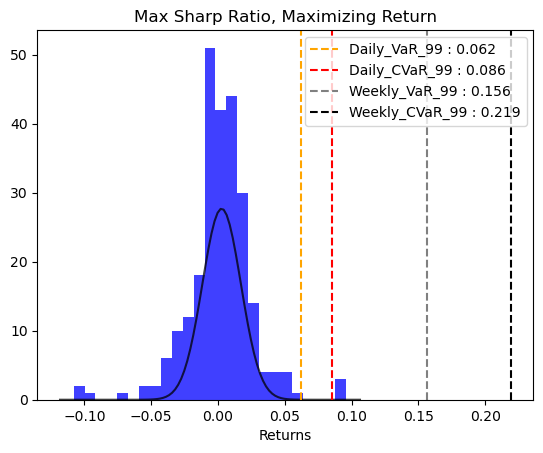

In [44]:
var_plot(returns_max,tdist_var_daily_max,tdist_cvar_daily_max,tdist_var_weekly_max,tdist_cvar_weekly_max,'Max Sharp Ratio, Maximizing Return')

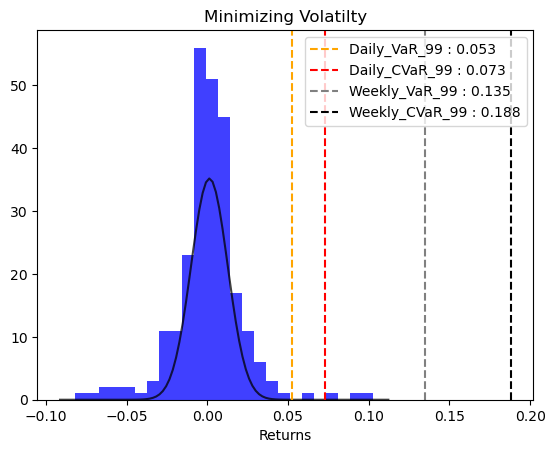

In [45]:
var_plot(returns_min,tdist_var_daily_min,tdist_cvar_daily_min,tdist_var_weekly_min,tdist_cvar_weekly_min,'Minimizing Volatilty')

# 4. Forward Testing the performance of the two portfolio on 2021 data

In [46]:
final_stocks_data_2021 = pd.DataFrame()
for i in final_stocks:
    final_stocks_data_2021[i] = yf.Ticker(i).history(start=start_2021, end=end_2021)['Close']

In [47]:
meanReturns_2021, covMatrix_2021 = getData(final_stocks_data_2021)

returns_2021_max, std_2021_max = portfolioPerformance(maxWeights, meanReturns_2021, covMatrix_2021)
returns_2021_min, std_2021_min = portfolioPerformance(minVarWeights, meanReturns_2021, covMatrix_2021)

In [48]:
print(f'Return for 2021 for the maximum return portfolio: {round(100*returns_2021_max,2)}% and volatility: {round(100*std_2021_max,2)}%')

Return for 2021 for the maximum return portfolio: 16.97% and volatility: 21.43%


In [49]:
print(f'Return for 2021 for the minimum volatility portfolio: {round(100*returns_2021_min,2)}% and volatility: {round(100*std_2021_min,2)}%')

Return for 2021 for the minimum volatility portfolio: 15.51% and volatility: 18.35%


# 5. Running simulation using Monte Carlo Simulation and calculating VaR and CVaR for simulation

In [50]:
def mcVaR(returns, alpha=5):
    """ Input: pandas series of returns
        Output: percentile on return distribution to a given confidence level alpha
    """
    if isinstance(returns, pd.Series):
        return np.percentile(returns, alpha)
    else:
        raise TypeError("Expected a pandas data series.")
def mcCVaR(returns, alpha=5):
    """ Input: pandas series of returns
        Output: CVaR or Expected Shortfall to a given confidence level alpha
    """
    if isinstance(returns, pd.Series):
        belowVaR = returns <= mcVaR(returns, alpha=alpha)
        return returns[belowVaR].mean()
    else:
        raise TypeError("Expected a pandas data series.")

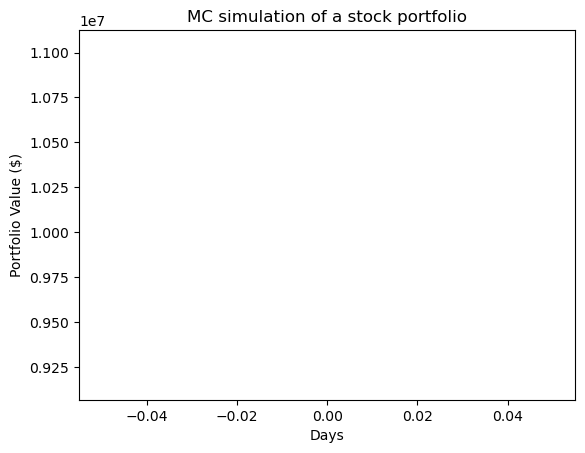

In [51]:
mc_sims = 10000 # number of simulations
T = 1 #timeframe in days
meanM = np.full(shape=(T, len(maxWeights)), fill_value=meanReturns)
meanM = meanM.T
portfolio_sims_max = np.full(shape=(T, mc_sims), fill_value=0.0)
initialPortfolio = 10000000
for m in range(0, mc_sims):
    Z = np.random.normal(size=(T, len(maxWeights)))#uncorrelated RV's
    L = np.linalg.cholesky(covMatrix) #Cholesky decomposition to Lower Triangular Matrix
    dailyReturns = meanM + np.inner(L, Z) #Correlated daily returns for individual stocks
    portfolio_sims_max[:,m] = np.cumprod(np.inner(maxWeights, dailyReturns.T)+1)*initialPortfolio
plt.plot(portfolio_sims_max)
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Days')
plt.title('MC simulation of a stock portfolio')
plt.show()

In [52]:
max_portResults = pd.Series(portfolio_sims_max[-1,:])
VaR = initialPortfolio - mcVaR(max_portResults, alpha=1)
CVaR = initialPortfolio - mcCVaR(max_portResults, alpha=1)
print("Simulated daily 99% CI Var and CVar for Max Return Portofolio:")
print(f'VaR ${round(VaR,2)}')
print(f'CVaR ${round(CVaR,2)}')

Simulated daily 99% CI Var and CVar for Max Return Portofolio:
VaR $566447.94
CVaR $644089.42


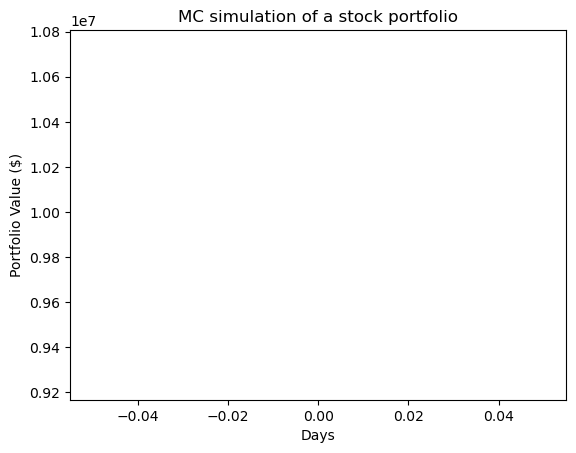

In [53]:
mc_sims = 10000 # number of simulations
T = 1 #timeframe in days
meanM = np.full(shape=(T, len(minVarWeights)), fill_value=meanReturns)
meanM = meanM.T
portfolio_sims_min = np.full(shape=(T, mc_sims), fill_value=0.0)
initialPortfolio = 10000000
for m in range(0, mc_sims):
    Z = np.random.normal(size=(T, len(minVarWeights)))#uncorrelated RV's
    L = np.linalg.cholesky(covMatrix) #Cholesky decomposition to Lower Triangular Matrix
    dailyReturns = meanM + np.inner(L, Z) #Correlated daily returns for individual stocks
    portfolio_sims_min[:,m] = np.cumprod(np.inner(minVarWeights, dailyReturns.T)+1)*initialPortfolio
plt.plot(portfolio_sims_min)
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Days')
plt.title('MC simulation of a stock portfolio')
plt.show()

In [54]:
min_portResults = pd.Series(portfolio_sims_min[-1,:])
VaR = initialPortfolio - mcVaR(min_portResults, alpha=1)
CVaR = initialPortfolio - mcCVaR(min_portResults, alpha=1)
print("Simulated Daily 99th CI Var and CVar for Min Return Portofolio:")
print(f'VaR ${round(VaR,2)}')
print(f'CVaR ${round(CVaR,2)}')

Simulated Daily 99th CI Var and CVar for Min Return Portofolio:
VaR $461992.49
CVaR $536983.23


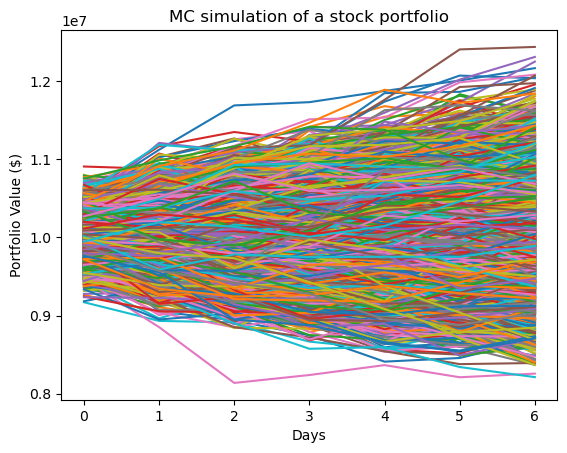

In [55]:
mc_sims = 10000 # number of simulations
T = 7 #timeframe in days
meanM = np.full(shape=(T, len(minVarWeights)), fill_value=meanReturns)
meanM = meanM.T
portfolio_sims_min = np.full(shape=(T, mc_sims), fill_value=0.0)
initialPortfolio = 10000000
for m in range(0, mc_sims):
    Z = np.random.normal(size=(T, len(minVarWeights)))#uncorrelated RV's
    L = np.linalg.cholesky(covMatrix) #Cholesky decomposition to Lower Triangular Matrix
    dailyReturns = meanM + np.inner(L, Z) #Correlated daily returns for individual stocks
    portfolio_sims_min[:,m] = np.cumprod(np.inner(minVarWeights, dailyReturns.T)+1)*initialPortfolio
plt.plot(portfolio_sims_min)
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Days')
plt.title('MC simulation of a stock portfolio')
plt.show()

In [56]:
min_portResults = pd.Series(portfolio_sims_min[-1,:])
VaR = initialPortfolio - mcVaR(min_portResults, alpha=1)
CVaR = initialPortfolio - mcCVaR(min_portResults, alpha=1)
print("Simulated Weekly 99th CI Var and CVar for Min Return Portofolio:")
print(f'VaR ${round(VaR,2)}')
print(f'CVaR ${round(CVaR,2)}')

Simulated Weekly 99th CI Var and CVar for Min Return Portofolio:
VaR $1202362.03
CVaR $1355216.39


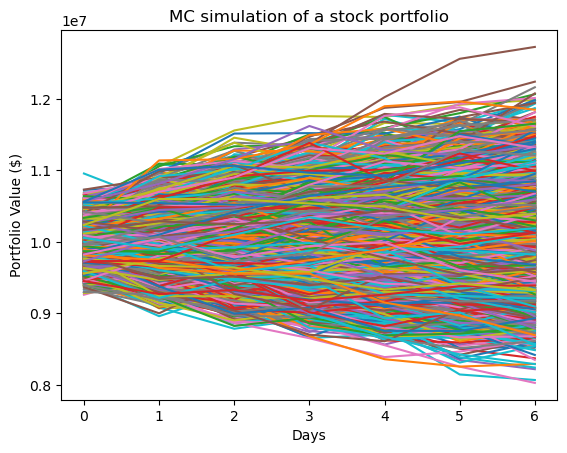

In [57]:
mc_sims = 10000 # number of simulations
T = 7 #timeframe in days
meanM = np.full(shape=(T, len(minVarWeights)), fill_value=meanReturns)
meanM = meanM.T
portfolio_sims_min = np.full(shape=(T, mc_sims), fill_value=0.0)
initialPortfolio = 10000000
for m in range(0, mc_sims):
    Z = np.random.normal(size=(T, len(minVarWeights)))#uncorrelated RV's
    L = np.linalg.cholesky(covMatrix) #Cholesky decomposition to Lower Triangular Matrix
    dailyReturns = meanM + np.inner(L, Z) #Correlated daily returns for individual stocks
    portfolio_sims_min[:,m] = np.cumprod(np.inner(minVarWeights, dailyReturns.T)+1)*initialPortfolio
plt.plot(portfolio_sims_min)
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Days')
plt.title('MC simulation of a stock portfolio')
plt.show()

In [58]:
min_portResults = pd.Series(portfolio_sims_min[-1,:])
VaR = initialPortfolio - mcVaR(min_portResults, alpha=1)
CVaR = initialPortfolio - mcCVaR(min_portResults, alpha=1)
print("Simulated Weekly 99th CI Var and CVar for Min Return Portofolio:")
print(f'VaR ${round(VaR,2)}')
print(f'CVaR ${round(CVaR,2)}')

Simulated Weekly 99th CI Var and CVar for Min Return Portofolio:
VaR $1176840.33
CVaR $1343541.43


# 6. The SP500 index for 2021

In [59]:
import pandas_datareader.data as web
import datetime
SP500 = web.DataReader(['sp500'], 'fred', start_2021, end_2021)

In [60]:
w_SP500 = np.array([1])

meanReturns_SP500, covMatrix_SP500 = getData(SP500)
returns, std = portfolioPerformance(w_SP500, meanReturns_SP500, covMatrix_SP500)

print(f'The annulized return for the SP500 index in year 2021 is: {round(returns*100,2)}%, and the volatility is {round(std*100,2)}%')

The annulized return for the SP500 index in year 2021 is: 25.45%, and the volatility is 12.83%


In [61]:
SP500['daily_return'] = (SP500['sp500']/ SP500['sp500'].shift(1)) -1

#Drop all Not a number values using drop method.
SP500.dropna(inplace = True)

<AxesSubplot:title={'center':'S&P 500 daily returns'}, xlabel='DATE'>

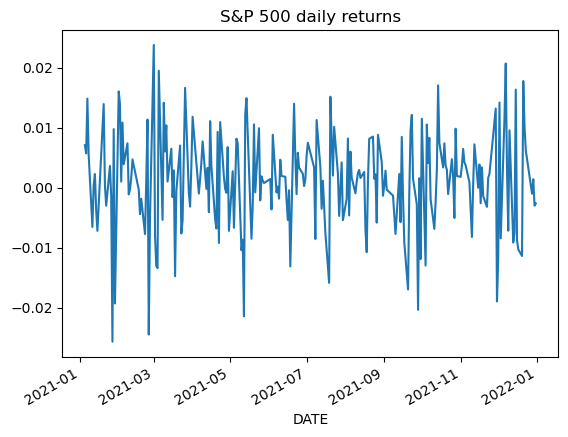

In [62]:
SP500['daily_return'].plot(title='S&P 500 daily returns')

# 7. Miscellaneous

In [63]:
def get_stock_news(stock, api_key):
    url = f'https://eodhistoricaldata.com/api/news?api_token={api_key}&s={stock}'
    news_json = requests.get(url).json()
    
    news = []
    
    for i in range(10):
        title = news_json[-i]['title']
        news.append(title)
        print(cl('{}. '.format(i+1), attrs = ['bold']), '{}'.format(title))
    
    return news

References:

Cao Thai, Khuong Lân. “How to Calculate the Daily Returns and Volatility of a Stock With Python.” Medium, 29 June 2022, blog.devgenius.io/how-to-calculate-the-daily-returns-and-volatility-of-a-stock-with-python-d4e1de53e53b.

EMERICK, JONATHON. “Portfolio Optimisation – QuantPy.” Portfolio Optimisation – QuantPy, quantpy.com.au/python-for-finance/portfolio-optimisation.

EMERICK. (n.d.). Value at Risk (VaR) and Conditional VaR (CVaR) – QuantPy. Value at Risk (VaR) and Conditional VaR (CVaR) – QuantPy. https://quantpy.com.au/risk-management/value-at-risk-var-and-conditional-var-cvar/